In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import scipy.stats
import statsmodels.api as sm

df_eda = pd.read_csv('data/skills_features.csv')


### The exploratory data analysis below is performed on the subset of the extracted data, including only Data Analysts positions.

In [70]:
# filter data frame to only contain data for 'analysts' jobs
analysts = df_eda[df_eda['title'].str.contains('analyst', case=False)]

In [71]:
analysts

,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,date_time,...,description_token_tableau,description_token_tensorflow,description_token_terminal,description_token_unix,description_token_vb.net,description_token_vba,description_token_visio,description_token_visual_basic,description_token_vue.js,description_token_word
0,0,Data Analyst Technical - Consultant,Intermountain Healthcare,"Oklahoma City, OK",via Monster,"['19 hours ago', 'Full-time', 'Health insurance']",19 hours ago,Full-time,False,00:10.1,...,0,0,0,0,0,1,0,0,0,0
1,1,"Sr Analyst, Data Engineer",Estee Lauder Companies,Oklahoma,via ZipRecruiter,"['12 hours ago', 'Full-time']",12 hours ago,Full-time,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
2,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
3,3,Data analyst,Modis,United States,via BeBee,"['13 hours ago', 'No degree mentioned']",13 hours ago,NaN,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
4,4,Data Analyst (Risk Adjustment Consulting Resea...,Cambia Health Solutions,United States,via LinkedIn,"['23 hours ago', 'Full-time', 'Health insuranc...",23 hours ago,Full-time,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11202,11202,Principal Data Analyst,Fidelity Investments,"Madill, OK",via JobiLike,"['19 hours ago', 'Full-time']",19 hours ago,Full-time,False,00:09.7,...,0,0,0,0,0,0,0,0,0,0
11204,11204,Senior Data Analyst,Oracle,"Jefferson City, MO",via Trabajo.org,"['19 hours ago', 'Full-time', 'Health insuranc...",19 hours ago,Full-time,False,00:11.6,...,0,0,0,0,0,0,0,0,0,0
11205,11205,Principal Data Analyst,Fidelity Investments,"Tishomingo, OK",via JobiLike,"['18 hours ago', 'Full-time']",18 hours ago,Full-time,False,00:11.6,...,0,0,0,0,0,0,0,0,0,0
11206,11206,Senior Data Analyst,Oracle,"Kansas City, MO",via Trabajo.org,"['13 hours ago', 'Full-time', 'Health insuranc...",13 hours ago,Full-time,False,00:11.6,...,0,0,0,0,0,0,0,0,0,0


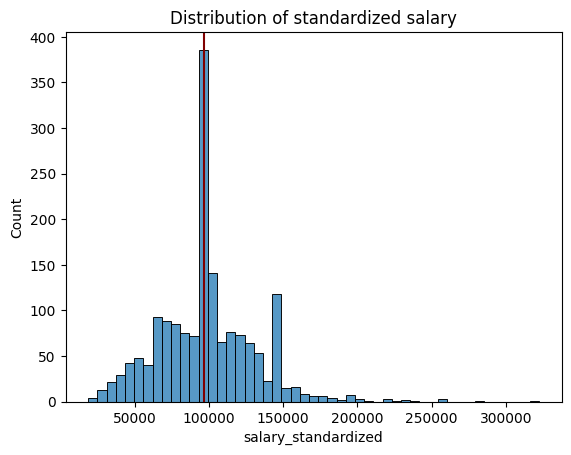

In [72]:
#plot the distribution of standard salary, display line for median salary
sns.histplot(x = 'salary_standardized', data = analysts)
plt.title('Distribution of standardized salary')
plt.axvline(x=analysts.salary_standardized.median(), color='maroon');

### Median salary for 'analyst' positions is close to 100000

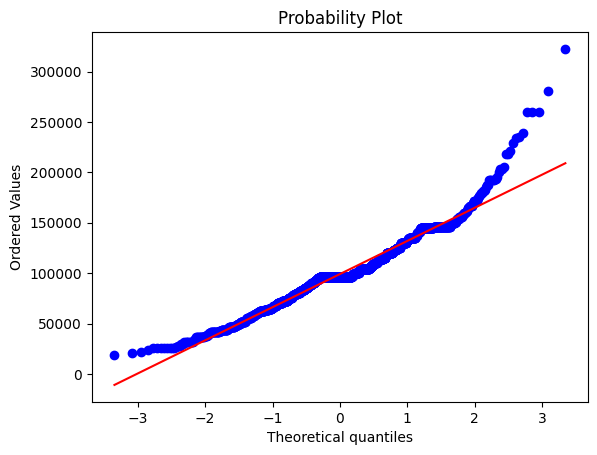

In [73]:
#use probability plot to double check the distribution of standard salary
#drop missing values to use the plot
scipy.stats.probplot(analysts['salary_standardized'].dropna(),dist='norm',plot=sns.mpl.pyplot);

### From the plots above we can see that standardized salary is not normaly distributed, the data is positively skewed.

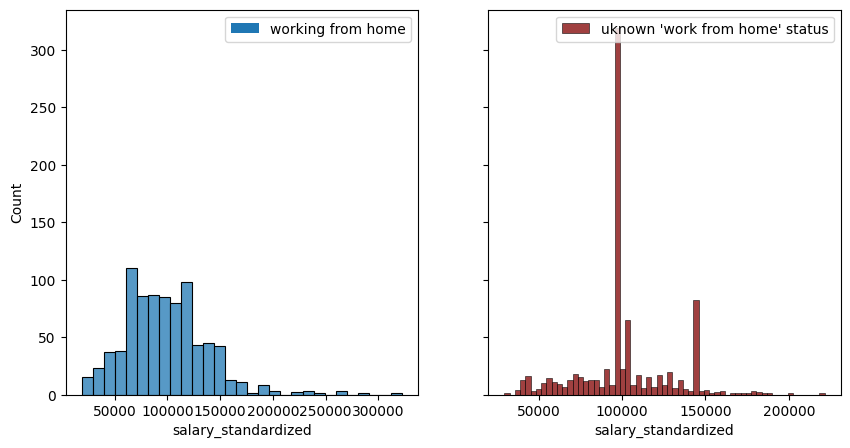

In [74]:
# two side by side histograms
#left plot for standardized salary distribution fo workers who work from home
#right plot shows salaries of workers whose 'work from home' status is uknown or false
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
sns.histplot(x = 'salary_standardized',  data = analysts[analysts['work_from_home']== True], ax=axs[0])
sns.histplot(x = 'salary_standardized',  data =analysts[analysts['work_from_home'] == False], ax=axs[1],color='maroon')
axs[0].legend(['working from home'])
axs[1].legend(["uknown 'work from home' status"]);

### From both graphs we see that data is not normally distributed. The right graph has 3 modes.

In [75]:
analysts

,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,date_time,...,description_token_tableau,description_token_tensorflow,description_token_terminal,description_token_unix,description_token_vb.net,description_token_vba,description_token_visio,description_token_visual_basic,description_token_vue.js,description_token_word
0,0,Data Analyst Technical - Consultant,Intermountain Healthcare,"Oklahoma City, OK",via Monster,"['19 hours ago', 'Full-time', 'Health insurance']",19 hours ago,Full-time,False,00:10.1,...,0,0,0,0,0,1,0,0,0,0
1,1,"Sr Analyst, Data Engineer",Estee Lauder Companies,Oklahoma,via ZipRecruiter,"['12 hours ago', 'Full-time']",12 hours ago,Full-time,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
2,2,Legal Data Analyst,DISYS,United States,via Indeed,"['4 hours ago', '21 to 23 an hour', 'Contractor']",4 hours ago,Contractor,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
3,3,Data analyst,Modis,United States,via BeBee,"['13 hours ago', 'No degree mentioned']",13 hours ago,NaN,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
4,4,Data Analyst (Risk Adjustment Consulting Resea...,Cambia Health Solutions,United States,via LinkedIn,"['23 hours ago', 'Full-time', 'Health insuranc...",23 hours ago,Full-time,False,00:10.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11202,11202,Principal Data Analyst,Fidelity Investments,"Madill, OK",via JobiLike,"['19 hours ago', 'Full-time']",19 hours ago,Full-time,False,00:09.7,...,0,0,0,0,0,0,0,0,0,0
11204,11204,Senior Data Analyst,Oracle,"Jefferson City, MO",via Trabajo.org,"['19 hours ago', 'Full-time', 'Health insuranc...",19 hours ago,Full-time,False,00:11.6,...,0,0,0,0,0,0,0,0,0,0
11205,11205,Principal Data Analyst,Fidelity Investments,"Tishomingo, OK",via JobiLike,"['18 hours ago', 'Full-time']",18 hours ago,Full-time,False,00:11.6,...,0,0,0,0,0,0,0,0,0,0
11206,11206,Senior Data Analyst,Oracle,"Kansas City, MO",via Trabajo.org,"['13 hours ago', 'Full-time', 'Health insuranc...",13 hours ago,Full-time,False,00:11.6,...,0,0,0,0,0,0,0,0,0,0


## Frequency of skill occurences.

In [76]:
# select just the columns containing skills, all the columns containing description_token_
cols =  analysts.columns[analysts.columns.str.startswith('desc')].tolist()
# create new dataframe that just contains the skills, drop descriptions_tokens column
skills_df = analysts[cols].drop(columns=['description_tokens'])


In [77]:
#count frequency of each value occurancy in each column and create a df
# store the frequencies in descending order
# select the second column from the new data frame and rename to skill_frequency
skills_count = pd.DataFrame(skills_df.apply(pd.Series.value_counts).iloc[1].sort_values(ascending=False)).rename(columns={1:'skill_frequency'})
#strip 'description_token_' string from each skill name
skills_count.index = skills_count.index.str.strip('description_token_')
print(skills_count)

          skill_frequency
 sql               4316.0
 pyth              2600.0
 excel             2459.0
 power_b           1854.0
 tableau           1832.0
...                   ...
ly                    NaN
j                     NaN
mssql                 NaN
wif                   NaN
vue.j                 NaN

[212 rows x 1 columns]


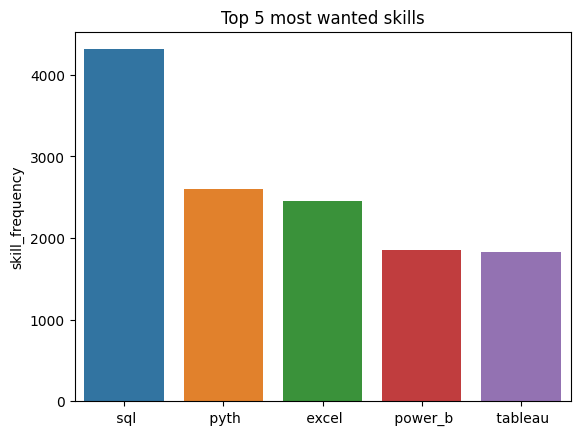

In [78]:
# skills' frequencies were stored in new df in descending order
# pick top 5 to dispay the popularity
sns.barplot(data=skills_count[:5],x=skills_count[:5].index,y=skills_count[:5]['skill_frequency'])
plt.title("Top 5 most wanted skills")
plt.savefig('images/top5_skills.png')


### checking distribution of salaries for SQl, python and tableau

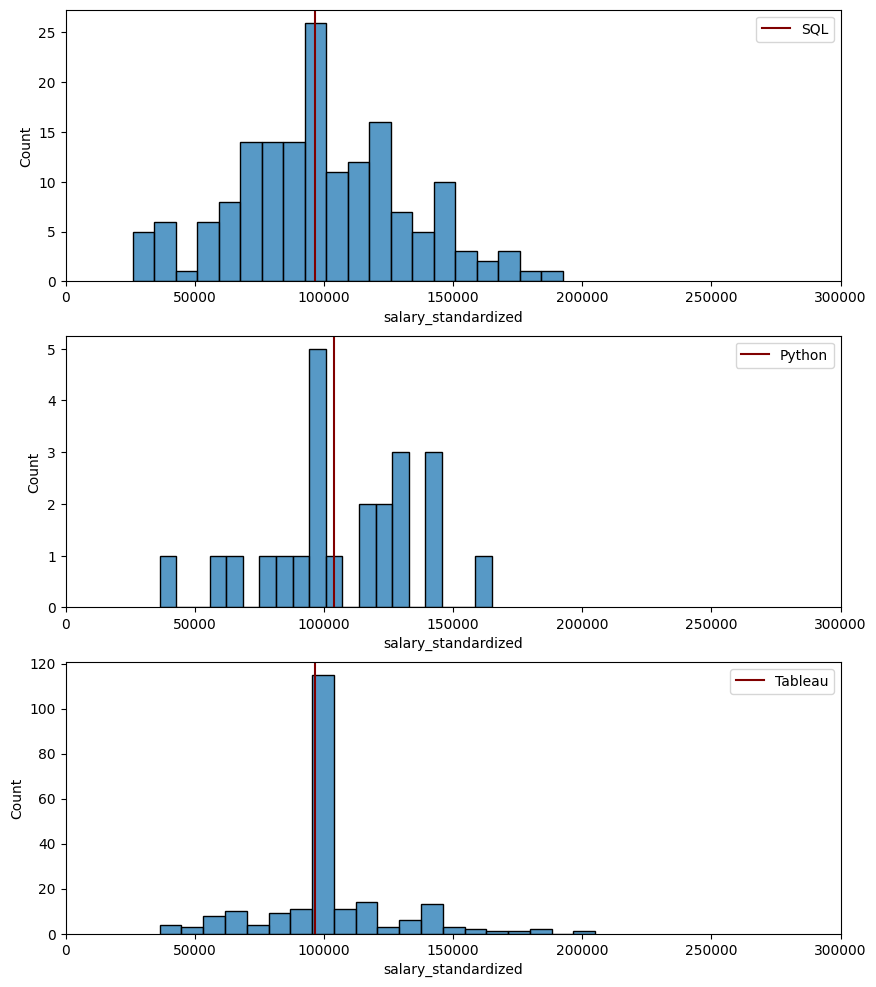

In [79]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 12), sharex=False)
sns.histplot(x = 'salary_standardized', data = analysts[analysts['description_token_sql']== 1],ax=axs[0], bins = 20)
sns.histplot(x = 'salary_standardized',  data = analysts[analysts['description_token_python']== 1], ax=axs[1], bins = 20)
sns.histplot(x = 'salary_standardized',  data = analysts[analysts['description_token_tableau']== 1], ax=axs[2], bins = 20)
axs[0].axvline(x=analysts[analysts['description_token_sql']== 1]['salary_standardized'].median(), color='maroon')
axs[1].axvline(x=analysts[analysts['description_token_python']== 1]['salary_standardized'].median(), color='maroon')
axs[2].axvline(x=analysts[analysts['description_token_tableau']== 1]['salary_standardized'].median(), color='maroon')
axs[0].legend(['SQL'])
axs[1].legend(['Python'])
axs[2].legend(['Tableau'])
axs[0].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000])
axs[1].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000])
axs[2].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000]);

## Frequency of cities

In [80]:
#checking the most popular locations for 'analysts' jobs
analysts['location'].value_counts()[:7]

Anywhere              3731
United States         2288
Kansas City, MO        356
Oklahoma City, OK      256
Jefferson City, MO     214
Tulsa, OK              140
Columbia, MO           130
Name: location, dtype: int64

#### Need to find top 5 cities for data analysts positions. We have postions that are listed as 'Anywhere' and 'United States'. While 'United States' is probably just missing data, 'Anywhere' could mean 'work from home' positions. 

#### If we count 'work from home' True positions for 'Anywhere', we see it's the same number 3731.

In [81]:
analysts[analysts['work_from_home'] == True]['location'].value_counts()

Anywhere    3731
Name: location, dtype: int64

In [82]:
#Remove the states from the 'location' names to account cities that are listed without states
# skip locations 'Anywhere' and 'United States'
top_cities = pd.DataFrame(analysts['location'].str.partition(",")[0].value_counts()[2:7])

In [83]:
top_cities

,0
Kansas City,404
Oklahoma City,256
Jefferson City,214
Tulsa,140
Columbia,130


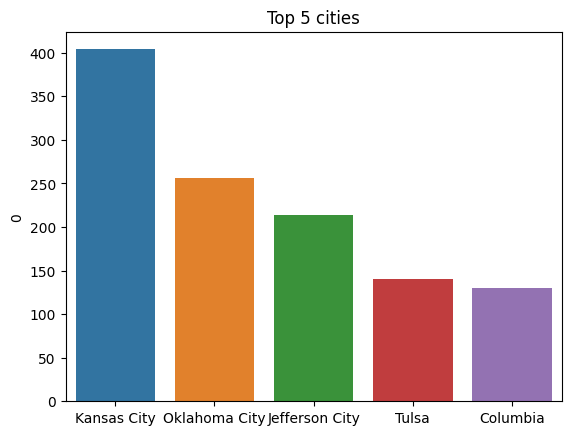

In [84]:
#plot top 5 cities
sns.barplot(data=top_cities,x=top_cities.index, y=top_cities[0])
plt.title("Top 5 cities");

#### These are top cities, however there are more jobs offered Anywhere or Unites States(presumaly both of these are remote positions, I think Anywhere - Anywhere in the world, USA - remote anywhere in USA). There is the same amount of jobs listed as 'Anywhere' and as 'work_from_home'. We are also missing data for such major cities as New York, Atlanta, Los Angeles

In [85]:
#using regular expression to find any location that contains 'new'
import re
pattern = re.compile('.*new.*', flags=re.IGNORECASE)
filtered_df = analysts[analysts['location'].str.contains(pattern,na=False)]

In [86]:
filtered_df.head()

,id,title,company_name,location,via,extensions,posted_at,schedule_type,work_from_home,date_time,...,description_token_tableau,description_token_tensorflow,description_token_terminal,description_token_unix,description_token_vb.net,description_token_vba,description_token_visio,description_token_visual_basic,description_token_vue.js,description_token_word
154,154,Data Analyst II,EDWARD JONES,"New Bloomfield, MO",via WJHL Jobs,"['13 hours ago', 'Full-time', 'Health insurance']",13 hours ago,Full-time,False,00:28.4,...,0,0,0,0,0,0,0,0,0,0
157,157,Lead Data Analyst,EDWARD JONES,"Newburg, MO",via WREG Jobs,"['13 hours ago', 'Full-time', 'Health insurance']",13 hours ago,Full-time,False,00:28.4,...,0,0,0,0,0,0,0,0,0,0
1173,1173,Lead-Data Analyst,EDWARD JONES,"New Bloomfield, MO",via My ArkLaMiss Jobs,"['15 hours ago', '106,916 to 182,047 a year', ...",15 hours ago,Full-time,False,00:16.8,...,0,0,0,0,0,0,0,0,0,0
1332,1332,Lead Data Science Analyst,Discover Financial Services,"New Home, MO",via LinkedIn,"['17 hours ago', 'Full-time']",17 hours ago,Full-time,False,00:28.9,...,0,0,0,0,0,0,0,0,0,0
1470,1470,Lead Data Analyst,EDWARD JONES,"Newburg, MO",via Monster,"['21 hours ago', 'Full-time', 'Health insurance']",21 hours ago,Full-time,False,19:21.1,...,0,0,0,0,0,0,0,0,0,0


### The data set doesn't contain any data speciifcally for Los Angeles, New York, and Atlanta

### Procede with 'work from home' jobs and top 3 cities

In [87]:
#remove the state from location name, just to have the cities
analysts['location'] = analysts['location'].str.partition(',')[0]


/var/folders/kc/j4ss26096jv9xkwkcr7z36kr0000gn/T/ipykernel_87085/2007239438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysts['location'] = analysts['location'].str.partition(',')[0]


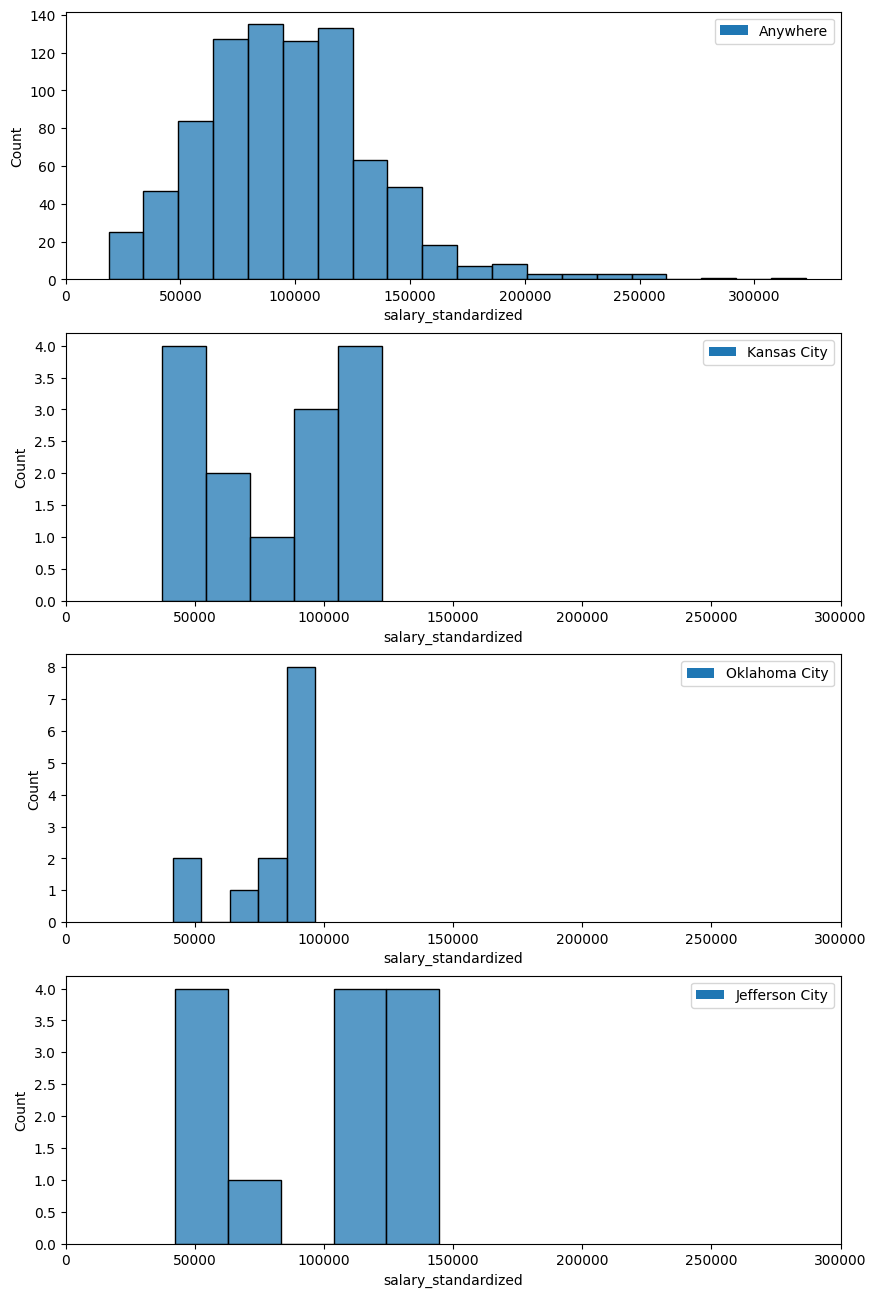

In [88]:
fig, axs = plt.subplots(nrows=4, figsize=(10, 16), sharex=False)
sns.histplot(x = 'salary_standardized', data = analysts[analysts['location']== 'Anywhere'],ax=axs[0], bins = 20)
sns.histplot(x = 'salary_standardized',  data = analysts[analysts['location']== 'Kansas City'], ax=axs[1], bins = 5)
sns.histplot(x = 'salary_standardized',  data = analysts[analysts['location']== 'Oklahoma City'], ax=axs[2], bins = 5)
sns.histplot(x = 'salary_standardized',  data = analysts[analysts['location']== 'Jefferson City'], ax=axs[3], bins = 5)
axs[0].legend(['Anywhere'])
axs[1].legend(['Kansas City'])
axs[2].legend(['Oklahoma City'])
axs[3].legend(['Jefferson City'])
axs[0].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000])
axs[1].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000])
axs[2].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000])
axs[3].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000]);

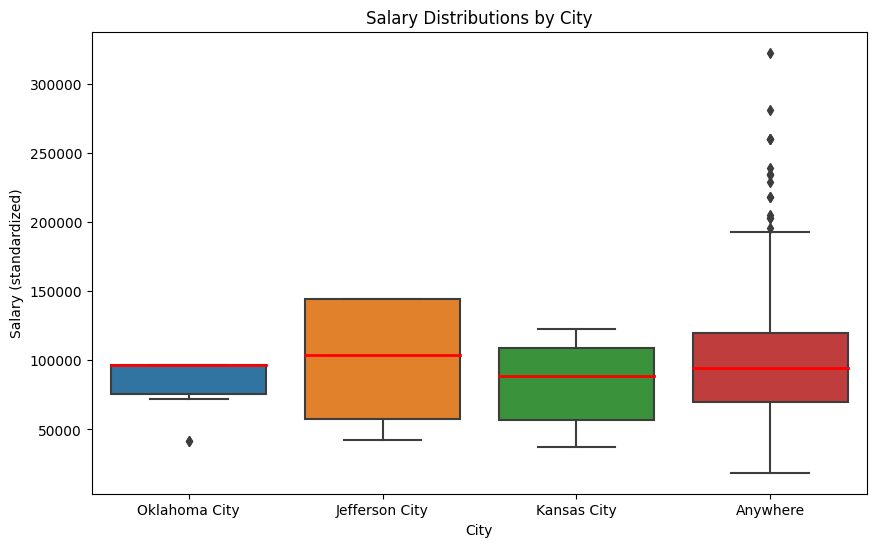

In [89]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='location', y='salary_standardized', data=analysts[analysts['location'].isin(['Anywhere','Kansas City', 'Oklahoma City', 'Jefferson City'])],medianprops={'color': 'red', 'linewidth': 2}, ax=ax)

ax.set_xlabel('City')
ax.set_ylabel('Salary (standardized)')
ax.set_title('Salary Distributions by City');

# Top companies for data analysts

In [90]:
top_companies = pd.DataFrame(analysts.company_name.value_counts()[:5])

In [91]:
top_companies

,company_name
EDWARD JONES,574
Upwork,530
Cox Communications,321
Corporate,269
Talentify.io,249


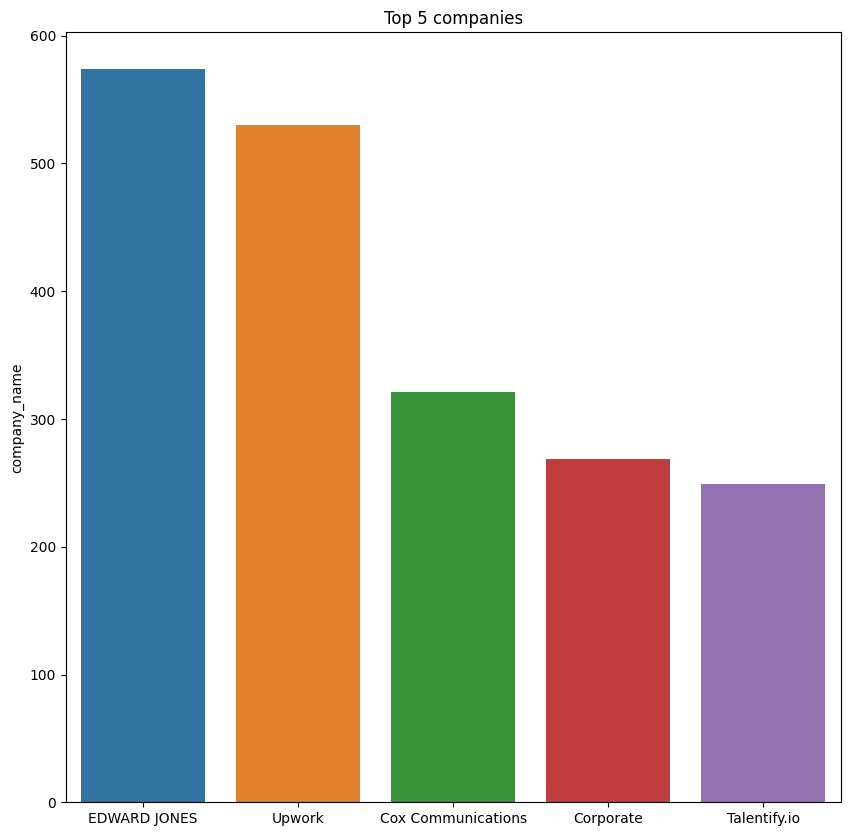

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=top_companies,x=top_companies.index, y=top_companies['company_name'], width=0.8)
plt.title("Top 5 companies")
plt.savefig("images/top5_companies.png")

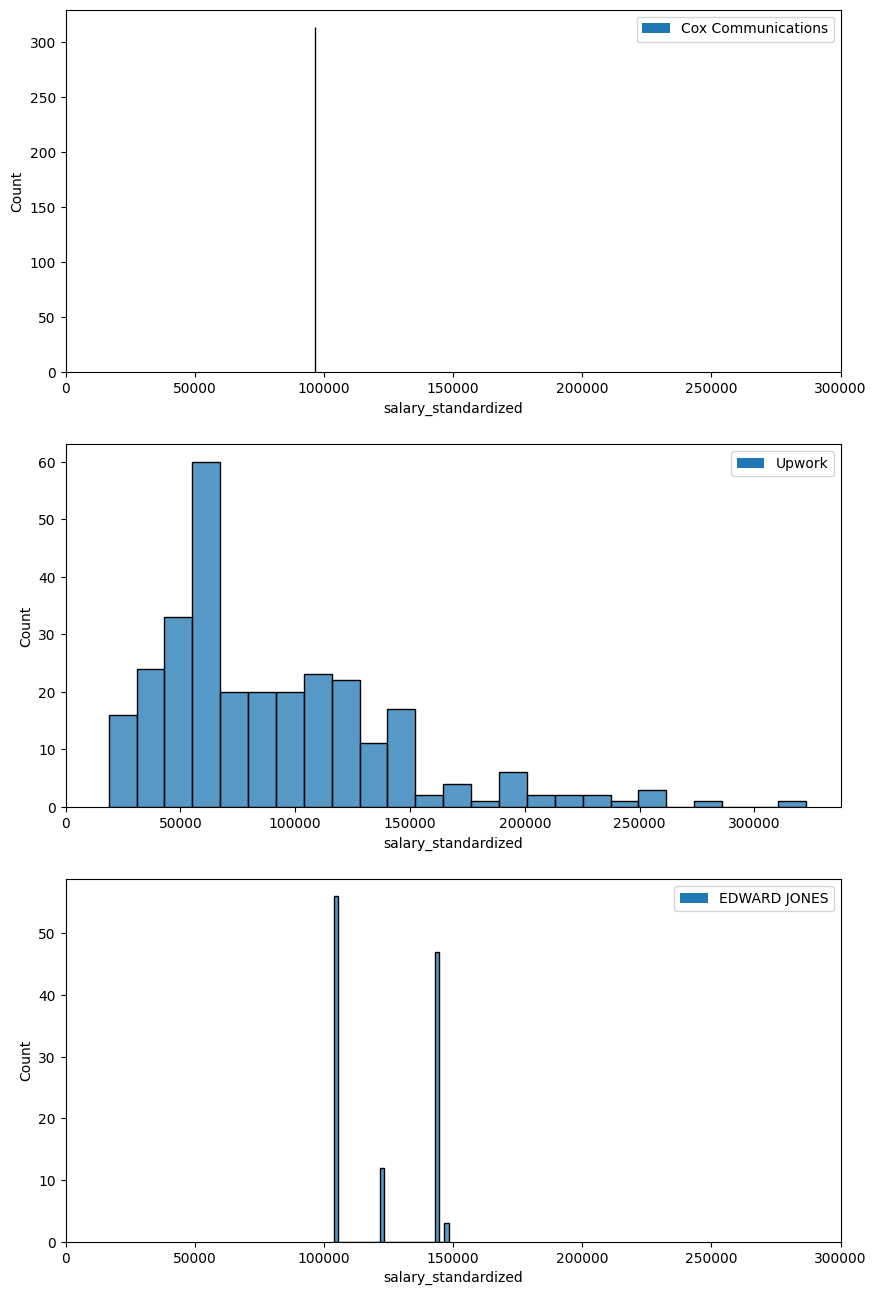

In [93]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 16), sharex=False)
sns.histplot(x = 'salary_standardized', data = analysts[analysts['company_name']== 'Cox Communications'],ax=axs[0], bins =25)
sns.histplot(x = 'salary_standardized',  data = analysts[analysts['company_name']== 'Upwork'], ax=axs[1], bins = 25)
sns.histplot(x = 'salary_standardized',  data = analysts[analysts['company_name']== 'EDWARD JONES'], ax=axs[2], bins = 25)

axs[0].legend(['Cox Communications'])
axs[1].legend(['Upwork'])
axs[2].legend(['EDWARD JONES'])
axs[0].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000])
axs[1].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000])
axs[2].set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000]);

### Cox Communications have the same salary for 300+ positions.

In [94]:
#there is the same salary for all the values in Cox Communicatons, hence the resulting graph
analysts[analysts['company_name'] == 'Cox Communications']['salary_standardized'] 

22           NaN
566      96500.0
584      96500.0
603      96500.0
614      96500.0
          ...   
9908     96500.0
9910     96500.0
10086    96500.0
10102    96500.0
10200        NaN
Name: salary_standardized, Length: 321, dtype: float64

In [95]:
res = analysts.dropna(subset='salary_standardized')

In [96]:
res.company_name.value_counts()

Cox Communications             314
Upwork                         291
EDWARD JONES                   118
Insight Global                  67
Harnham                         63
                              ... 
Future Foam Inc                  1
Pediatric Associates             1
WeatherTech                      1
Continental Resources, Inc.      1
Peraton                          1
Name: company_name, Length: 542, dtype: int64

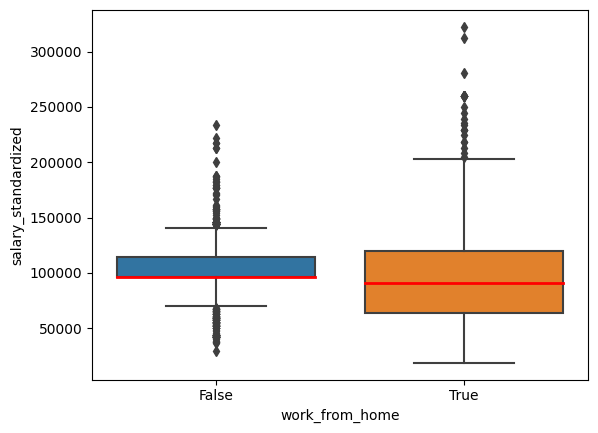

In [97]:
sns.boxplot(x='work_from_home', y='salary_standardized',data=df_eda,medianprops={'color': 'red', 'linewidth': 2})
plt.savefig("images/dist_work_home.png")